In [147]:
pip install yfinance --upgrade --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import plotly.express as px
import plotly.graph_objects as go

In [3]:
sp500 = yf.Ticker("^GSPC")

In [5]:
# get all stock info
sp500.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 4924.97,
 'open': 4899.19,
 'dayLow': 4845.15,
 'dayHigh': 4906.75,
 'regularMarketPreviousClose': 4924.97,
 'regularMarketOpen': 4899.19,
 'regularMarketDayLow': 4845.15,
 'regularMarketDayHigh': 4906.75,
 'volume': 3297263000,
 'regularMarketVolume': 3297263000,
 'averageVolume': 3921968333,
 'averageVolume10days': 3951036000,
 'averageDailyVolume10Day': 3951036000,
 'bid': 4814.01,
 'ask': 4895.08,
 'fiftyTwoWeekLow': 3808.86,
 'fiftyTwoWeekHigh': 4931.09,
 'fiftyDayAverage': 4703.944,
 'twoHundredDayAverage': 4430.5015,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegRatio': 

In [6]:
# get historical market data
hist = sp500.history(period = "max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0
2024-01-26 00:00:00-05:00,4888.910156,4906.689941,4881.470215,4890.970215,3353400000,0.0,0.0
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,0.0,0.0


In [87]:
# show actions (dividends, splits, capital gains)
#sp500.actions
#sp500.dividends
#sp500.splits
#sp500.capital_gains  # only for mutual funds & etfs

In [89]:
# Reset index
hist.reset_index(inplace = True)
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
24128,2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0.0,0.0
24129,2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0
24130,2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,0.0,0.0
24131,2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0


In [91]:
# Checking for null values in the dataset
null_mask = hist.isnull().any(axis=1)
null_rows = hist[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []


In [93]:
# Checking for NA's in the dataset
print(hist.isnull().any())

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool


In [94]:
# Extract Year from 'Date' column
hist['Year'] = hist['Date'].dt.year
hist["Month"] = hist["Date"].dt.month
hist["Day"] = hist["Date"].dt.day
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,1927,12,30
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,1928,1,3
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,1928,1,4
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,1928,1,5
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,1928,1,6
...,...,...,...,...,...,...,...,...,...,...,...
24128,2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0.0,0.0,2024,1,22
24129,2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0,2024,1,23
24130,2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,0.0,0.0,2024,1,24
24131,2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0,2024,1,25


In [97]:
hist["Month Name"] = hist["Date"].dt.month_name()

In [99]:
hist.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
Year                                       int32
Month                                      int32
Day                                        int32
Month Name                                object
dtype: object

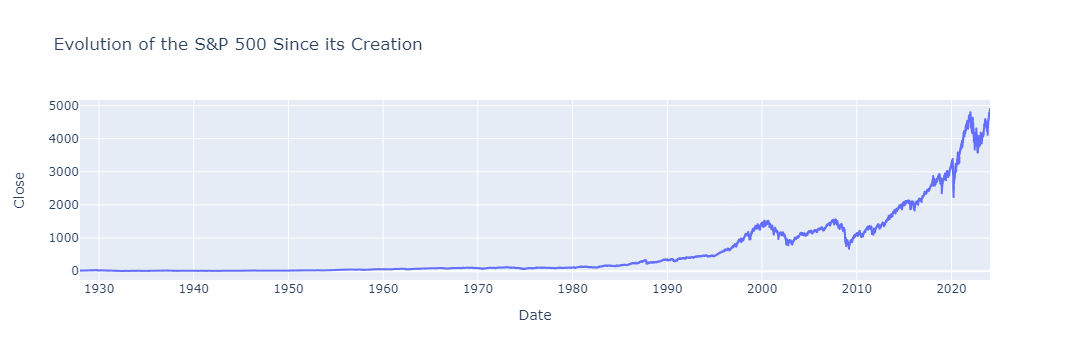

In [ ]:
# Plot the entire Time series 
fig1 = px.line(hist, x = 'Date', y = 'Close', title = 'Evolution of the S&P 500 Since its Creation')
fig1.show()

In [102]:
# We want to know the behavior of the S&P500 between 2016 and today


# Convert the date to datetime64
hist['Date'] = pd.to_datetime(hist['Date'], format='%Y-%m-%d')

# Let's create the dataset for the years 2016 and 2023
df_sp500 = hist.loc[(hist['Date'] >= '2016-01-01') & (hist['Date'].dt.date < date.today())]
df_sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Month Name
22103,2016-01-04 00:00:00-05:00,2038.199951,2038.199951,1989.680054,2012.660034,4304880000,0.0,0.0,2016,1,4,January
22104,2016-01-05 00:00:00-05:00,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,0.0,0.0,2016,1,5,January
22105,2016-01-06 00:00:00-05:00,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,0.0,0.0,2016,1,6,January
22106,2016-01-07 00:00:00-05:00,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,0.0,0.0,2016,1,7,January
22107,2016-01-08 00:00:00-05:00,1945.969971,1960.400024,1918.459961,1922.030029,4664940000,0.0,0.0,2016,1,8,January
...,...,...,...,...,...,...,...,...,...,...,...,...
24128,2024-01-22 00:00:00-05:00,4853.419922,4868.410156,4844.049805,4850.430176,4297610000,0.0,0.0,2024,1,22,January
24129,2024-01-23 00:00:00-05:00,4856.799805,4866.479980,4844.370117,4864.600098,3912800000,0.0,0.0,2024,1,23,January
24130,2024-01-24 00:00:00-05:00,4888.560059,4903.680176,4865.939941,4868.549805,4330030000,0.0,0.0,2024,1,24,January
24131,2024-01-25 00:00:00-05:00,4886.660156,4898.149902,4869.339844,4894.160156,4020430000,0.0,0.0,2024,1,25,January


In [103]:
df_sp500.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
Year                                       int32
Month                                      int32
Day                                        int32
Month Name                                object
dtype: object

In [104]:
# Let's remove the time from the date
df_sp500['S&P500Date'] = df_sp500['Date'].dt.date
df_sp500

# Let's create a column with month_year periods
df_sp500['month_year'] = pd.to_datetime(df_sp500['S&P500Date']).dt.to_period('M')
df_sp500.head(10)

/tmp/ipykernel_80/1167600321.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_80/1167600321.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Month Name,S&P500Date,month_year
22103,2016-01-04 00:00:00-05:00,2038.199951,2038.199951,1989.680054,2012.660034,4304880000,0.0,0.0,2016,1,4,January,2016-01-04,2016-01
22104,2016-01-05 00:00:00-05:00,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,0.0,0.0,2016,1,5,January,2016-01-05,2016-01
22105,2016-01-06 00:00:00-05:00,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,0.0,0.0,2016,1,6,January,2016-01-06,2016-01
22106,2016-01-07 00:00:00-05:00,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,0.0,0.0,2016,1,7,January,2016-01-07,2016-01
22107,2016-01-08 00:00:00-05:00,1945.969971,1960.400024,1918.459961,1922.030029,4664940000,0.0,0.0,2016,1,8,January,2016-01-08,2016-01
22108,2016-01-11 00:00:00-05:00,1926.119995,1935.650024,1901.099976,1923.670044,4607290000,0.0,0.0,2016,1,11,January,2016-01-11,2016-01
22109,2016-01-12 00:00:00-05:00,1927.829956,1947.380005,1914.349976,1938.680054,4887260000,0.0,0.0,2016,1,12,January,2016-01-12,2016-01
22110,2016-01-13 00:00:00-05:00,1940.339966,1950.329956,1886.410034,1890.280029,5087030000,0.0,0.0,2016,1,13,January,2016-01-13,2016-01
22111,2016-01-14 00:00:00-05:00,1891.680054,1934.469971,1878.930054,1921.839966,5241110000,0.0,0.0,2016,1,14,January,2016-01-14,2016-01
22112,2016-01-15 00:00:00-05:00,1916.680054,1916.680054,1857.829956,1880.329956,5468460000,0.0,0.0,2016,1,15,January,2016-01-15,2016-01


In [105]:
# Let's check for the correlation between 'Close' column and the other variables
df_sp500[df_sp500.columns[1:6]].corr()['Close'].sort_values()

Volume    0.187983
Open      0.999357
High      0.999646
Low       0.999687
Close     1.000000
Name: Close, dtype: float64

# Let's plot the whole data for the period 2016 to Today

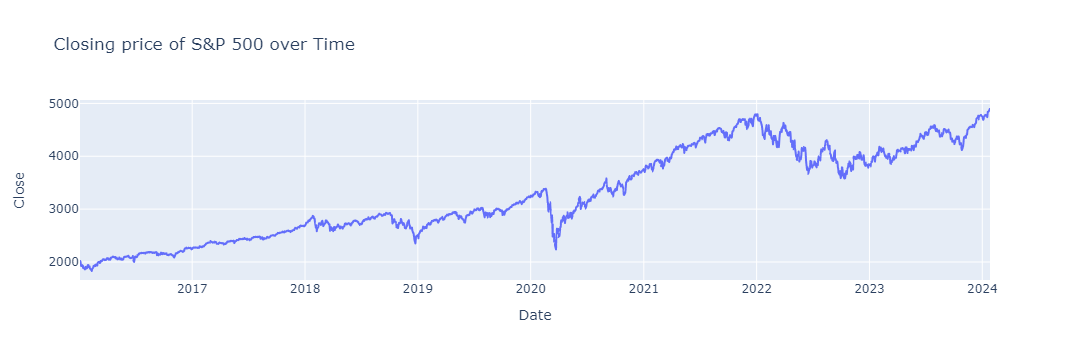

In [107]:
fig_plt = px.line(df_sp500, x = 'Date', y = 'Close', title = "Closing price of S&P 500 over Time")
fig_plt.show()

In [167]:
# Let's Calculate the average 'Close' index  for every year

df_sp500_close = df_sp500.groupby(['Year'])['Close'].mean().reset_index()
df_sp500_close

,Year,Close
0,2016,2094.651264
1,2017,2449.076379
2,2018,2746.214183
3,2019,2913.356380
4,2020,3217.855849
5,2021,4273.385635
6,2022,4098.514748
7,2023,4283.729439
8,2024,4788.653971


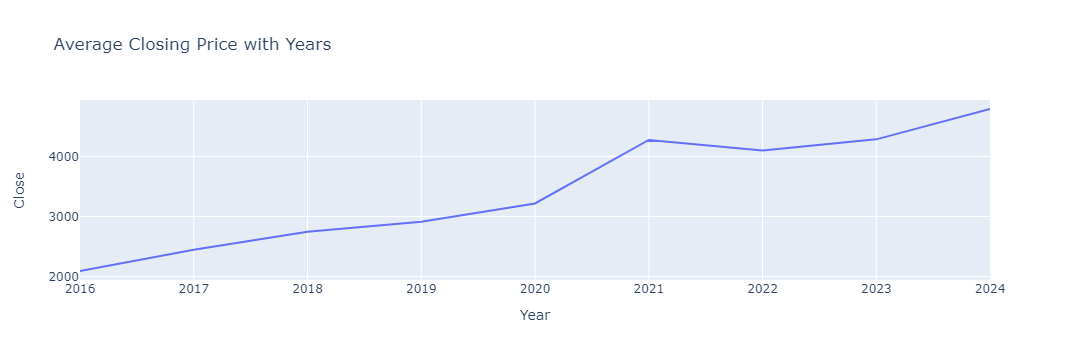

In [173]:
# Let's plot the mean values
fig2 = px.line(df_sp500_close, x = 'Year', y= 'Close', title = 'Average Closing Price with Years')
fig2.show()

# Let's Calculate the average Closing price  for every period month_year

In [137]:
df_sp500_close = df_sp500.groupby(['Year', 'Month'])['Close'].mean().reset_index()
df_sp500_close

,Year,Month,Close
0,2016,1,1918.597888
1,2016,2,1904.418494
2,2016,3,2021.954090
3,2016,4,2075.535232
4,2016,5,2065.550479
...,...,...,...
92,2023,9,4409.094995
93,2023,10,4269.400945
94,2023,11,4460.063314
95,2023,12,4685.051489


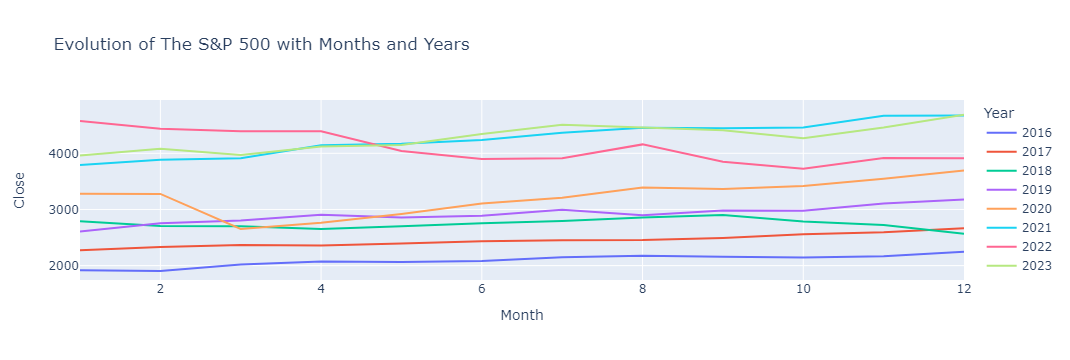

In [159]:
# Let's plot the mean values per Month and per Year
fig3 = px.line(df_sp500_close, x = 'Month', y= 'Close', color = 'Year', title = 'Evolution of The S&P 500 with Months and Years')
fig3.show()

# Let's now analyze the volatility of the S&P 500 with Years

In [142]:
df_sp500_close['Volatility'] = df_sp500_close.groupby('Year')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
df_sp500_close

,Year,Month,Close,Volatility
0,2016,1,1918.597888,NaN
1,2016,2,1904.418494,NaN
2,2016,3,2021.954090,NaN
3,2016,4,2075.535232,NaN
4,2016,5,2065.550479,NaN
...,...,...,...,...
92,2023,9,4409.094995,NaN
93,2023,10,4269.400945,NaN
94,2023,11,4460.063314,0.030889
95,2023,12,4685.051489,0.032800


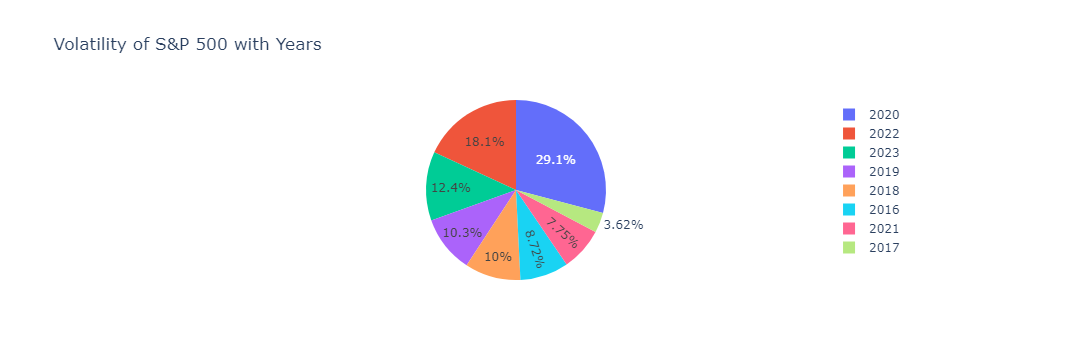

In [144]:
fig = px.pie(df_sp500_close, values='Volatility', names='Year', 
              #color='Year', 
              title='Volatility of S&P 500 with Years')
fig.show()

In [182]:
# Let's check for the correlation between 'Volume' column and the other variables
df_sp500[df_sp500.columns[1:6]].corr()['Volume'].sort_values()

Low       0.179207
Close     0.187983
Open      0.191104
High      0.197981
Volume    1.000000
Name: Volume, dtype: float64

(0.0, 10410519500.0)

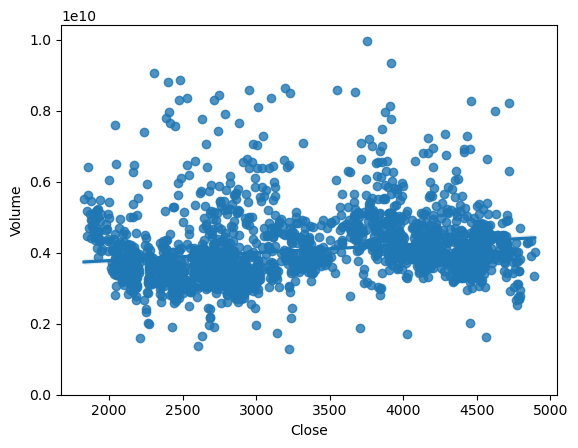

In [190]:
# Let's plot the scatter plot with the regression line
sns.regplot(data = df_sp500, x = 'Close', y = 'Volume')
plt.ylim(0,)

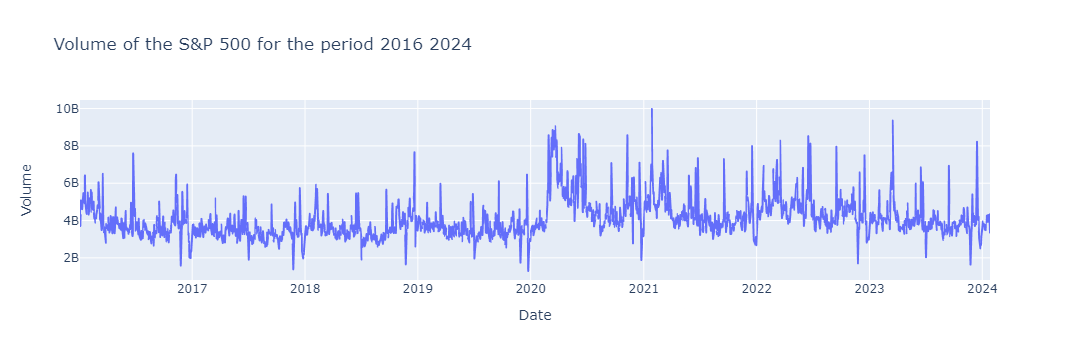

In [194]:
# Let's plot the Volume with the years for te period 2016-2024

fig_vol = px.line(df_sp500, x = 'Date', y = 'Volume', title = 'Volume of the S&P 500 for the period 2016 2024')
fig_vol.show()

# Import datasets to CSV format

In [155]:
hist.to_csv("hist.csv", sep=';', index=False)
df_sp500.to_csv("df_sp500.csv", sep=';', index=False)
df_sp500_close.to_csv("df_sp500_close.csv", sep=';', index=False)

In [5]:
df_infl = pd.read_csv("Inflation_us.csv")
df_infl

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,CPI,FOOD,AGRWTH,M,2022-11,15.210990,NaN
1,AUT,CPI,FOOD,AGRWTH,M,2022-12,16.097560,NaN
2,AUT,CPI,FOOD,AGRWTH,M,2023-01,16.992190,NaN
3,AUT,CPI,FOOD,AGRWTH,M,2023-02,16.159700,NaN
4,AUT,CPI,FOOD,AGRWTH,M,2023-03,14.513110,NaN
...,...,...,...,...,...,...,...,...
1686,EU27_2020,CPI,TOT_FOODENRG,AGRWTH,M,2023-11,4.100000,NaN
1687,AUS,CPI,TOT,AGRWTH,M,2022-11,7.831822,NaN
1688,AUS,CPI,TOT,AGRWTH,M,2023-02,7.021792,NaN
1689,AUS,CPI,TOT,AGRWTH,M,2023-05,6.026963,NaN
